In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df = pd.read_csv('/content/E-Commerce DataSet.csv')

In [3]:
# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   rec_id      100000 non-null  int64 
 1   order_id    100000 non-null  object
 2   order_date  100000 non-null  object
 3   shipped_at  88090 non-null   object
 4   prod_sku    99987 non-null   object
 5   prod_qty    100000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.6+ MB
None
    rec_id                               order_id        order_date  \
0  3476212  FC__3__296__RS__657__1216__1308861465  03-11-2015 06:44   
1  3476204  FC__3__296__RS__616__1139__1308857858  03-11-2015 06:43   
2  3472447    FC__3__296__RS__664__1238__58147367  31-10-2015 18:30   
3  3634024         FC__3__2__RS__2__1__3006075214  01-12-2015 18:30   
4  3535415  FC__3__296__RS__652__1200__1325959053  11-11-2015 09:41   

         shipped_at             prod_sku  prod_qty  
0  05-11-2015 02:56     ACCD

In [3]:
# Convert date columns to datetime format (Modify column names as per dataset)
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y %H:%M', errors='coerce')
df['shipped_at'] = pd.to_datetime(df['shipped_at'], format='%d-%m-%Y %H:%M', errors='coerce')

In [10]:
# Handle missing values
df['shipped_at'].fillna(pd.NaT, inplace=True)
df['prod_sku'].fillna("Unknown SKU", inplace=True)
df.dropna(inplace=True)

<ipython-input-10-d07d39374218>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['shipped_at'].fillna(pd.NaT, inplace=True)  # Keep NaT for datetime columns
<ipython-input-10-d07d39374218>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [11]:
# Create new time-based features
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_weekday'] = df['order_date'].dt.weekday
df['order_hour'] = df['order_date'].dt.hour

In [12]:
# Compute Recency, Frequency, Monetary (RFM) Metrics
rfm_df = df.groupby('rec_id').agg(
    recency=('order_date', lambda x: (df['order_date'].max() - x.max()).days),
    frequency=('order_id', 'count'),
    monetary=('prod_qty', 'sum')  # Assuming product quantity as spending metric
).reset_index()

In [13]:
# Normalize the RFM values for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']])

In [14]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

In [15]:
# Merge RFM values back to the original dataset
df = df.merge(rfm_df[['rec_id', 'recency', 'frequency', 'monetary', 'cluster']], on='rec_id', how='left')

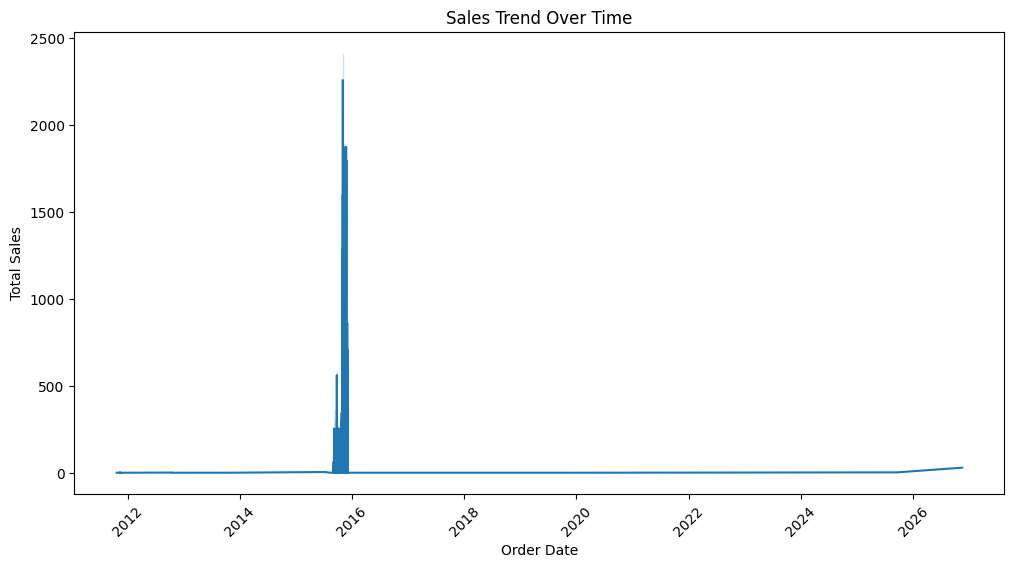

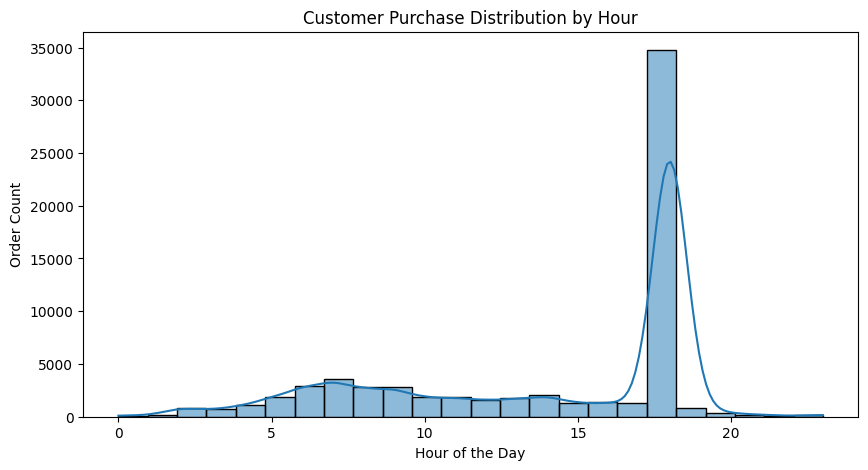

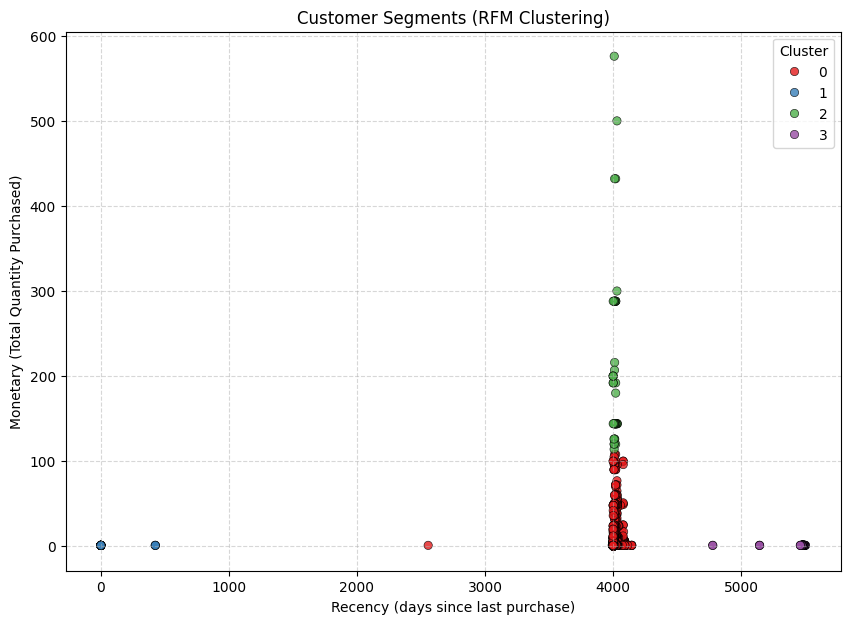

In [17]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='order_date', y='prod_qty', estimator='sum')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['order_hour'], bins=24, kde=True)
plt.title('Customer Purchase Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=rfm_df, x='recency', y='monetary', hue='cluster', palette='Set1', alpha=0.8, edgecolor='black')
plt.title("Customer Segments (RFM Clustering)")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary (Total Quantity Purchased)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Cluster")
plt.show()

In [18]:
# Save preprocessed dataset
df.to_csv('preprocessed_sales_data.csv', index=False)
print("Preprocessed dataset saved successfully.")

Preprocessed dataset saved successfully.


In [19]:
from google.colab import files

files.download('preprocessed_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>